## PBL(1): Individual Project Work
1. https://agtechresearch.pythonanywhere.com/ 에 접속하여 회원가입해 주세요. (비밀번호는 단순하게 만드는 것을 권장. 예: 1234)
2. `username` 에 이메일 형식의 아이디를 기입해 주세요.
3. `password` 에 비밀번호를 기입해 주세요.

In [1]:
project = "housingprice"  # 수정하지 마세요
username = "g4312@naver.com"  # 회원가입 시 사용한 이메일아이디 (예시. abc@hello.com)
password = "1234"  # 비밀번호

리더보드 제출을 위한 기본 설정: 아래 코드를 실행해주세요.


In [2]:
import os
import urllib.request

if not os.path.exists("competition.py"):
    url = "https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/competition/competition.py"
    filename = "competition.py"
    urllib.request.urlretrieve(url, filename)

아래 코드를 실행하여 데이터를 다운로드 받습니다: 3개의 csv 파일이 data 폴더에 다운로드됨

 * dataset.csv: 과거 주택매매 데이터 -> 학습에 사용할 데이터셋
 * problem.csv: 현재 A사가 매매를 고려하고 있는 130건의 주택정보 -> ML 모델에 의하여 예측을 수행하여야 할 데이터셋
 * submission.csv: 리더보드 서버 제출을 위한 파일 형식


In [3]:
import competition

# 파일 다운로드
competition.download_competition_files(project)

100%|██████████| 141k/141k [00:00<00:00, 351kiB/s] 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# Data 경로 설정
DATA_DIR = "data"

In [50]:
# 학습에 사용할 과거 주택매매 data set 로드 (dataset.csv)
dataset = pd.read_csv(os.path.join(DATA_DIR, "dataset.csv"))

# problem set 로드 (problem.csv)
problemset = pd.read_csv(os.path.join(DATA_DIR, "problem.csv"))

In [51]:
# # 결측치가 있다면 GarageType은 NO Garage로, GarageYrBlt의 값은 0으로 대체
dataset["GarageType"].fillna("No Garage", inplace=True)
dataset["GarageYrBlt"].fillna(0, inplace=True)

dataset.isnull().sum()


Id              0
LotArea         0
Street          0
LotConfig       0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

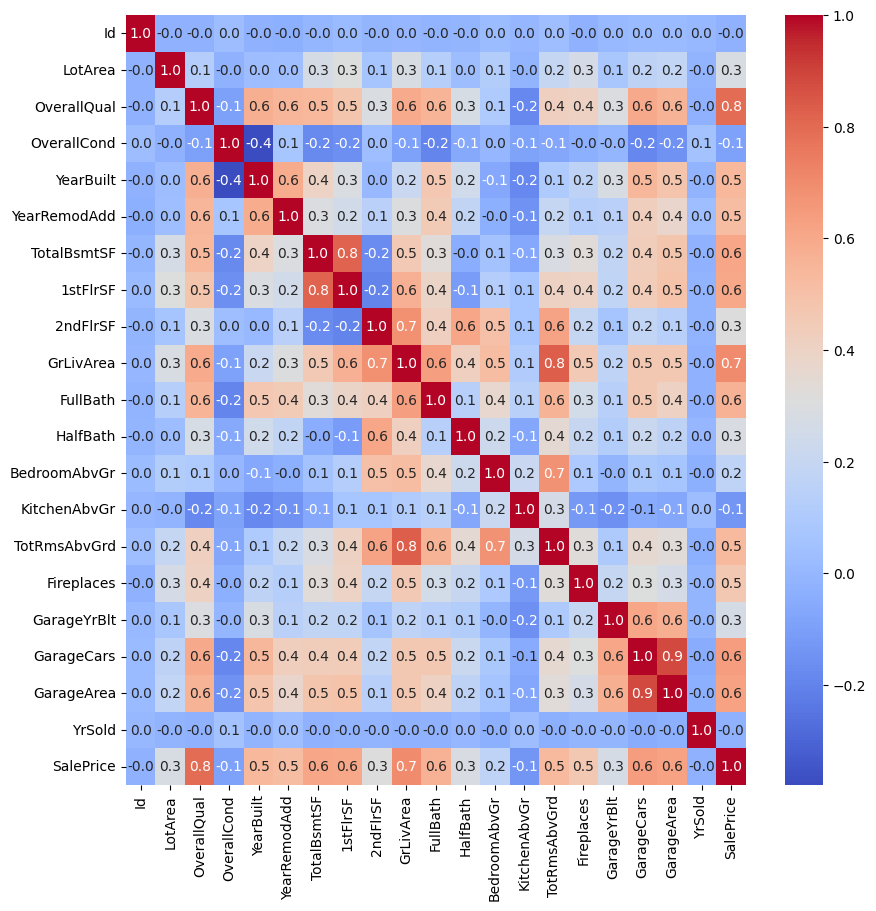

In [10]:
#dataset의 int,float만 포함한 heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.select_dtypes(include=["int", "float"]).corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.show()


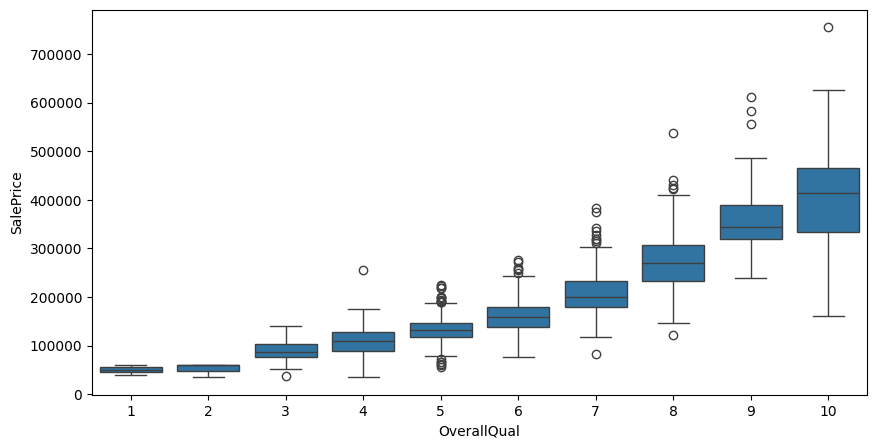

In [12]:
# 범주형 변수들과 SalePrice의 관계를 시각화
# OverallQual
plt.figure(figsize=(10, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=dataset)
plt.show()



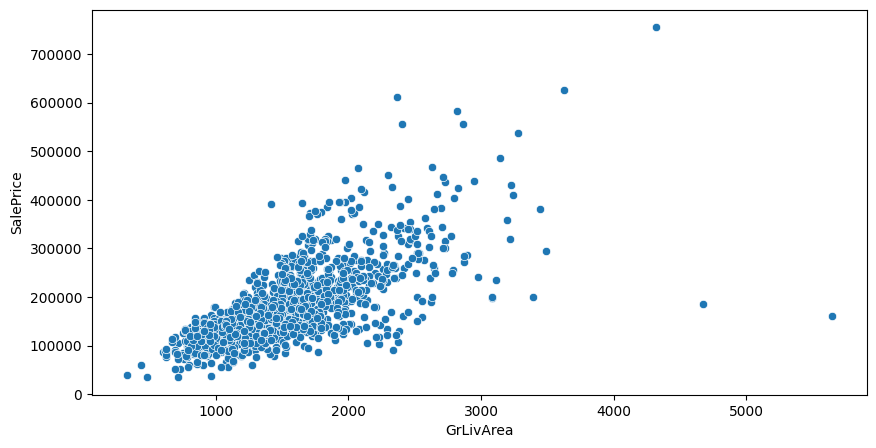

In [13]:
# GrLivArea와 SalePrice의 관계
plt.figure(figsize=(10, 5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=dataset)
plt.show()

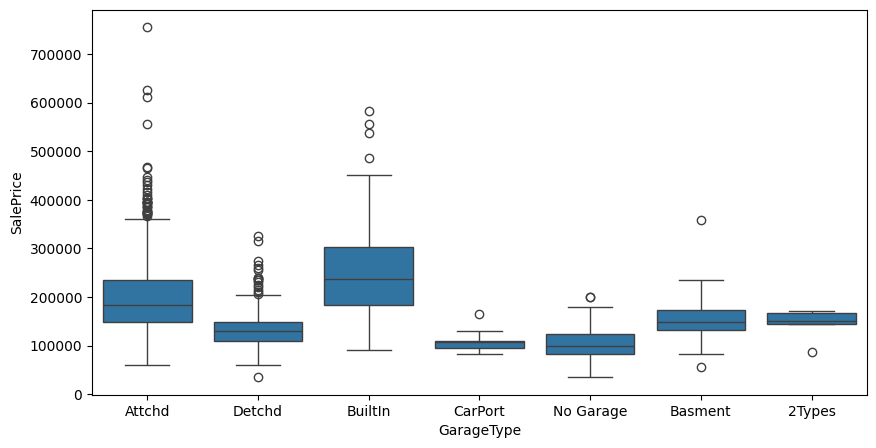

In [14]:
# GarageType과 SalePrice의 관계
plt.figure(figsize=(10, 5))
sns.boxplot(x="GarageType", y="SalePrice", data=dataset)
plt.show()


In [52]:
#dataset과 problemset의 GarageType 칼럼을 제거
dataset.drop(["GarageType"], axis=1, inplace=True)
problemset.drop(["GarageType"], axis=1, inplace=True)

In [53]:
# 딥러닝으로 모델링을 진행하기 위해 데이터 전처리
# 범주형 변수를 one-hot encoding
dataset = pd.get_dummies(dataset)
problemset = pd.get_dummies(problemset)


In [59]:
# 스케일링을하는데 , dataset의 스케일링에 따라 problemset도 변환
from sklearn.preprocessing import StandardScaler
sc =    StandardScaler()
dataset = sc.fit_transform(dataset)
problemset = sc.transform(problemset)





ValueError: X has 27 features, but StandardScaler is expecting 28 features as input.

In [17]:
# 학습 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X = dataset.drop("SalePrice", axis=1)
y = dataset["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1072, 34) (268, 34) (1072,) (268,)


In [28]:
# 딥러닝 모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
    return model


In [29]:
model = create_model()

In [30]:
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))

In [31]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

In [35]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0055


In [36]:
model.evaluate(X_test, y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026     


0.0054998500272631645

In [38]:
# problemset에 대한 예측
problemset = pd.get_dummies(problemset)
problemset = pd.DataFrame(scaler.transform(problemset), columns=problemset.columns)
pred = model.predict(problemset)



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- GarageType_Basment
- GarageType_CarPort
- GarageType_No Garage
- SalePrice
